In [33]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
with open('/content/log_human_readable.txt') as f:
    lines = f.readlines()

In [4]:
print(lines[:100])

['=============== Elephant-6 LOG NEXT ==================\n', '\n', 'Timestamp: 46.24\n', '\n', '"pulseOxygen": \t\t"NaN"\n', '\n', '"location": \t\t"NaN"\n', '\n', '"temperature": \t\t"NaN"\n', '\n', '"humidity": \t\t"NaN"\n', '\n', '=============== Elephant-6 LOG NEXT ==================\n', '\n', 'Timestamp: 48.24\n', '\n', '"pulseOxygen": \t\t[32.1, 93]\n', '\n', '"location": \t\t[467.4982, 478.7985]\n', '\n', '"temperature": \t\t27.40166\n', '\n', '"humidity": \t\t25.016\n', '\n', '=============== Elephant-6 LOG NEXT ==================\n', '\n', 'Timestamp: 50.24\n', '\n', '"pulseOxygen": \t\t[32.1, 93]\n', '\n', '"location": \t\t[467.4982, 478.7985]\n', '\n', '"temperature": \t\t27.40166\n', '\n', '"humidity": \t\t25.016\n', '\n', '=============== Elephant-6 LOG NEXT ==================\n', '\n', 'Timestamp: 52.24\n', '\n', '"pulseOxygen": \t\t[32.1, 93]\n', '\n', '"location": \t\t[467.4982, 478.7985]\n', '\n', '"temperature": \t\t27.40166\n', '\n', '"humidity": \t\t25.016\n', '\n',

In [14]:
elephants = []

zebras = []
lions = []
for i in range(0, 250000, 12):
  if ("Elephant" in lines[i]):
    e = dict()
    e["num"] = int(re.findall(r'\d+', lines[i])[0])
    e["t"] = float(lines[i+2][11:].strip())
    e["pox"] = lines[i+4][17:].strip().replace("[","").replace("]","").split()
    e["loc"] = lines[i+6][14:].strip().replace("[","").replace("]","").split()
    e["temp"] = lines[i+8][14:].strip().replace("[","").replace("]","")
    e["hum"] = lines[i+10][14:].strip().replace("[","").replace("]","")

    elephants.append(e)
  
  if ("Zebra" in lines[i]):
    z = dict()
    z["num"] = int(re.findall(r'\d+', lines[i])[0])
    z["t"] = float(lines[i+2][11:].strip())
    z["pox"] = lines[i+4][17:].strip().replace("[","").replace("]","").split()
    z["loc"] = lines[i+6][14:].strip().replace("[","").replace("]","").split()
    z["temp"] = lines[i+8][14:].strip().replace("[","").replace("]","")
    z["hum"] = lines[i+10][14:].strip().replace("[","").replace("]","")

    zebras.append(z)

  if ("Lion" in lines[i]):
    l = dict()
    l["num"] = int(re.findall(r'\d+', lines[i])[0])
    l["t"] = float(lines[i+2][11:].strip())
    l["pox"] = lines[i+4][17:].strip().replace("[","").replace("]","").split()
    l["loc"] = lines[i+6][14:].strip().replace("[","").replace("]","").split()
    l["temp"] = lines[i+8][14:].strip().replace("[","").replace("]","")
    l["hum"] = lines[i+10][14:].strip().replace("[","").replace("]","")

    lions.append(l)



print("ELEPHANTS: ", elephants)
print("ZEBRAS: ", zebras)
print("LIONS: ", lions)

ELEPHANTS:  [{'num': 6, 't': 46.24, 'pox': ['"NaN"'], 'loc': ['"NaN"'], 'temp': '"NaN"', 'hum': '"NaN"'}, {'num': 6, 't': 48.24, 'pox': ['32.1,', '93'], 'loc': ['467.4982,', '478.7985'], 'temp': '27.40166', 'hum': '25.016'}, {'num': 6, 't': 50.24, 'pox': ['32.1,', '93'], 'loc': ['467.4982,', '478.7985'], 'temp': '27.40166', 'hum': '25.016'}, {'num': 6, 't': 52.24, 'pox': ['32.1,', '93'], 'loc': ['467.4982,', '478.7985'], 'temp': '27.40166', 'hum': '25.016'}, {'num': 6, 't': 54.24, 'pox': ['33.15,', '93'], 'loc': ['467.4618,', '486.5372'], 'temp': '27.31243', 'hum': '24.81049'}, {'num': 6, 't': 56.24, 'pox': ['33.15,', '93'], 'loc': ['467.4618,', '486.5372'], 'temp': '27.31243', 'hum': '24.81049'}, {'num': 6, 't': 58.24, 'pox': ['34.2,', '93'], 'loc': ['467.3282,', '494.2853'], 'temp': '27.22031', 'hum': '24.61419'}, {'num': 6, 't': 60.24, 'pox': ['34.2,', '93'], 'loc': ['467.3282,', '494.2853'], 'temp': '27.22031', 'hum': '24.61419'}, {'num': 6, 't': 62.24, 'pox': ['34.2,', '93'], 'loc

Zebra Population =  7


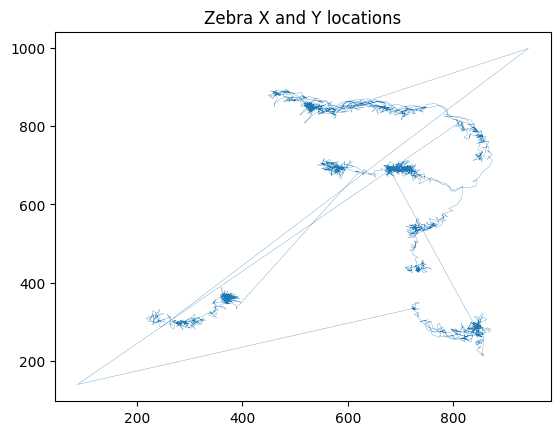

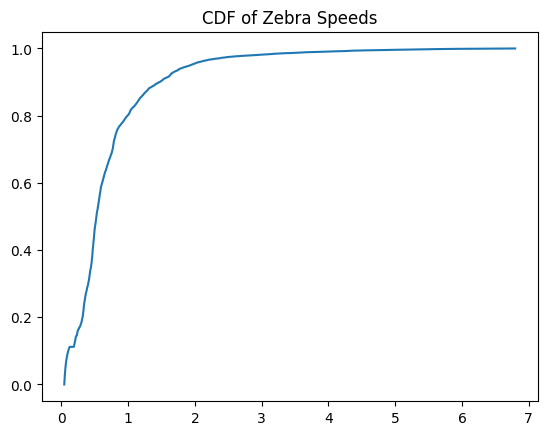

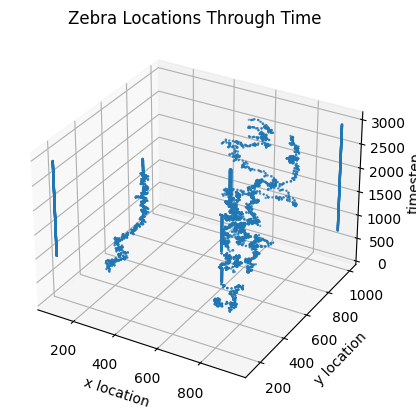

In [41]:


z_posx = []
z_posy = []
sorted_timesteps = []

z_speeds = []

num_zebs = 0
seen_zebs = []
zebs = []

#Sort the list of zebra dictionaries by animal number
newzeebs = sorted(zebras, key=lambda d: d['num']) 

curr_posx = 0
curr_posy = 0
curr_t = 0

for zeb in newzeebs:
  if (zeb["num"] not in seen_zebs):
    num_zebs += 1
    seen_zebs.append(zeb["num"])
  if (zeb["loc"][0] != '"NaN"'):
    #print(zeb["loc"][0])
    #print(zeb["loc"][1])
    z_posx.append(float(zeb["loc"][0].strip(',')))
    z_posy.append(float(zeb["loc"][1].strip(',')))
    sorted_timesteps.append(zeb["t"])

    z_velx = (float(zeb["loc"][0].strip(',')) - curr_posx) / (zeb["t"] - curr_t)
    z_vely = (float(zeb["loc"][0].strip(',')) - curr_posx) / (zeb["t"] - curr_t)

    z_speeds.append(np.sqrt(z_velx**2 + z_vely**2))


cdf = np.arange(len(z_speeds)) / len(z_speeds)
z_speeds.sort()
print("Zebra Population = ", len(seen_zebs))

plt.plot(z_posx, z_posy, lw=0.2)
plt.title("Zebra X and Y locations")
plt.show()

plt.plot(z_speeds, cdf)
plt.title("CDF of Zebra Speeds")
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(z_posx, z_posy, sorted_timesteps, s=0.5)
ax.set_xlabel("x location")
ax.set_ylabel("y location")
ax.set_zlabel("timestep")
ax.set_title("Zebra Locations Through Time")
plt.show()